### Annoy Fast Search Vs Brute Force Search

In [1]:
import numpy as np
from annoy import AnnoyIndex
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import model parameters and convert to arrays
with open('items.json') as f:
    items = json.load(f)
with open('users.json') as f:
    users = json.load(f)

items = np.array(items)
users = np.array(users)

#### Brute Force Search

In [3]:
#initialize empty lists to save time it takes to run brute force search and true recommendations
recs_true = []
time_brute = []
for i in range(len(users)):
    begin = time.time() #time each query
    user = np.array(users[i])
    rec = np.argsort(-np.dot(items,users[i]))[:500] #make recommendations
    time_took = time.time() -  begin
    time_brute.append(time_took) #save time it takes to run each query
    recs_true.append(rec) #save true recommendations

#### Search using Annoy Package

In [4]:
#initialize hyperparameters to try
n_trees = [5, 10, 30]
search_k = [1000, 10000, 50000,  100000, 200000, 500000, 1000000]

<function matplotlib.pyplot.show(*args, **kw)>

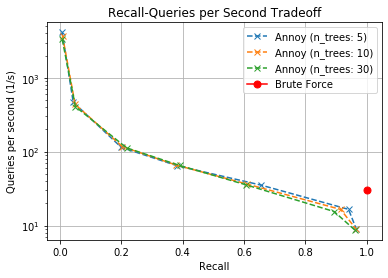

In [5]:
#loop through n_trees hyperparameter values
for n in n_trees:
    #build annoy forest for a given number of trees
    feature_dim = len(items[0])
    t = AnnoyIndex(feature_dim, metric='dot') #user dot product metric

    for i, vector in enumerate(items):
        t.add_item(i, vector)
    t.build(n)
    
    #initialize empty lists to save recall for each parameter combination and time it takes to run
    recall_res = []
    time_fast = []
    
    #loop through search_k hyperparameter values
    for k in search_k:
        time_ind = []
        recall_ind = []
        for i in range(len(users)):
            begin = time.time()
            recs = t.get_nns_by_vector(users[i], 500, search_k = k) #make recommendations
            time_took = time.time()-begin
            time_ind.append(time_took) #save time
            recall = len([x for x in recs if x in recs_true[i]])/len(recs)
            recall_ind.append(recall) #save recall
        time_fast.append(1/np.mean(time_ind))
        recall_res.append(np.mean(recall_ind))
        
    #plot results    
    plt.plot(recall_res,time_fast, label = 'Annoy (n_trees: {})'.format(n), linestyle='--', marker='x')
    plt.xlabel('Recall')
    plt.ylabel('Queries per second (1/s)')
    plt.title('Recall-Queries per Second Tradeoff')
    plt.grid()
plt.plot(1, 1/np.mean(time_brute), marker='o', markersize=7, color="red", label = 'Brute Force')
plt.yscale('log')
plt.legend(loc = 'best')
plt.show